In [44]:
from tensorflow import keras
from keras.datasets import mnist
import cv2
import numpy as np
import sys
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [45]:
(AX, ay), (QX, qy) = mnist.load_data()

In [46]:
AX.shape

(60000, 28, 28)

In [47]:
ax=np.empty((AX.shape[0],14,14))
for i in range(AX.shape[0]):
    ax[i]=cv2.resize(AX[i],(14,14))
    
qx=np.empty((QX.shape[0],14,14))
for i in range(QX.shape[0]):
    qx[i]=cv2.resize(QX[i],(14,14))

In [48]:
axn = np.zeros(ax.shape)
axs = np.zeros(ax.shape)
axl = np.zeros(ax.shape)
axo = np.zeros(ax.shape)

In [49]:
length = ax.shape[0]

In [50]:
for i in range(length):
    axn[i, :-1, :] = ax[i, 1:, :]    # Deslocamento para norte
    axs[i, 1:, :] = ax[i, :-1, :]    # Deslocamento para sul
    axl[i, :, 1:] = ax[i, :, :-1]    # Deslocamento para leste
    axo[i, :, :-1] = ax[i, :, 1:]    # Deslocamento para oeste

In [51]:
new_ax = np.zeros((5*length,14,14))
new_ax[:length,:,:] = ax[:,:,:]
new_ax[length:2*length,:,:] = axn[:,:,:]
new_ax[2*length:3*length,:,:] = axs[:,:,:]
new_ax[3*length:4*length,:,:] = axl[:,:,:]
new_ax[4*length:5*length,:,:] = axo[:,:,:]

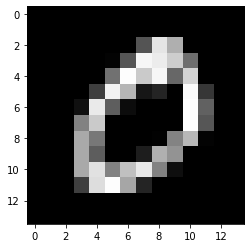

In [52]:
imgplot = plt.imshow(new_ax[1], cmap='gray', vmin=0, vmax=255)
plt.show()

Text(0.5, 1.0, 'Oeste')

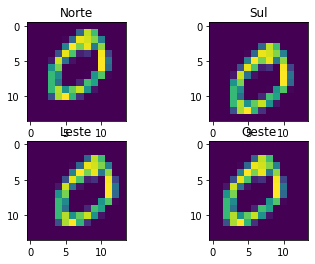

In [53]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.imshow(new_ax[1*length+1], cmap='gray', vmin=0, vmax=255)
ax1.set_title('Norte')
ax2.imshow(new_ax[2*length+1], cmap='gray', vmin=0, vmax=255)
ax2.set_title('Sul')
ax3.imshow(new_ax[3*length+1], cmap='gray', vmin=0, vmax=255)
ax3.set_title('Leste')
ax4.imshow(new_ax[4*length+1], cmap='gray', vmin=0, vmax=255)
ax4.set_title('Oeste')

In [55]:
new_ay = np.zeros(5*ay.shape[0])
new_ay[:ay.shape[0]] = ay[:]
new_ay[ay.shape[0]:2*ay.shape[0]] = ay[:]
new_ay[2*ay.shape[0]:3*ay.shape[0]] = ay[:]
new_ay[3*ay.shape[0]:4*ay.shape[0]] = ay[:]
new_ay[4*ay.shape[0]:5*ay.shape[0]] = ay[:]

In [56]:
new_ax = new_ax.astype('float32')
qx = qx.astype('float32')
new_ax = new_ax.reshape(new_ax.shape[0],new_ax.shape[1]*new_ax.shape[2])
qx = qx.reshape(qx.shape[0],qx.shape[1]*qx.shape[2])
new_ax /= 255.0 #0 a 1
qx /= 255.0 #0 a 1
qp=np.empty(qy.shape,dtype="uint8")

In [57]:
t1 = time.time()
FLANN_INDEX_KDTREE = 1
flann_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 4)
flann = cv2.flann_Index(new_ax, flann_params)
t2 = time.time()
matches, dists = flann.knnSearch(qx, 1)
t3 = time.time()

In [58]:
for l in range(matches.shape[0]):
    i=matches[l]
    qp[l]=new_ay[i]

In [59]:
erros=0;
for l in range(matches.shape[0]):
    if qp[l]!=qy[l]: erros+=1

In [60]:
print("Erros=%5.2f%%" % (100.0*erros/qy.shape[0]) )
print("Tempo de treinamento: %f"%(t2-t1))
print("Tempo de predicao: %f"%(t3-t2))

Erros= 3.84%
Tempo de treinamento: 6.465460
Tempo de predicao: 0.335360
